In [2]:
import pandas as pd
import geopandas as gpd
from cenpy import products
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import osmnx as ox

/opt/conda/lib/python3.8/site-packages/cenpy/remote.py:224: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if index is not "":
/opt/conda/lib/python3.8/site-packages/cenpy/tiger.py:186: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if kwargs.get("returnGeometry", "true") is "false":


In [3]:
sci = pd.read_csv('county_county.tsv', sep = '\t', dtype=str)

In [4]:
sci.head()

,user_loc,fr_loc,scaled_sci
0,01001,01001,8946863
1,01001,01003,101997
2,01001,01005,134341
3,01001,01007,254620
4,01001,01009,67196


In [5]:
sci['FIPS'] = sci.user_loc.astype(str)

In [6]:
sci.set_index('FIPS', inplace=True)

In [7]:
sci_fl = sci[sci['user_loc'].str.startswith('12')].reset_index(drop=True)
sci_ga = sci[sci['user_loc'].str.startswith('13')].reset_index(drop=True)
sci_sc = sci[sci['user_loc'].str.startswith('45')].reset_index(drop=True)
sci_nc = sci[sci['user_loc'].str.startswith('37')].reset_index(drop=True)
sci_md = sci[sci['user_loc'].str.startswith('24')].reset_index(drop=True)
sci_dc = sci[sci['user_loc'].str.startswith('11')].reset_index(drop=True)
sci_va = sci[sci['user_loc'].str.startswith('51')].reset_index(drop=True)
sci_de = sci[sci['user_loc'].str.startswith('10')].reset_index(drop=True)
sci_nj = sci[sci['user_loc'].str.startswith('34')].reset_index(drop=True)
sci_pa = sci[sci['user_loc'].str.startswith('42')].reset_index(drop=True)
sci_ny = sci[sci['user_loc'].str.startswith('36')].reset_index(drop=True)
sci_ct = sci[sci['user_loc'].str.startswith('09')].reset_index(drop=True)
sci_ri = sci[sci['user_loc'].str.startswith('44')].reset_index(drop=True)
sci_ma = sci[sci['user_loc'].str.startswith('25')].reset_index(drop=True)
sci_vt = sci[sci['user_loc'].str.startswith('50')].reset_index(drop=True)
sci_nh = sci[sci['user_loc'].str.startswith('33')].reset_index(drop=True)
sci_me = sci[sci['user_loc'].str.startswith('23')].reset_index(drop=True)

In [8]:
sci_fl.head()

,user_loc,fr_loc,scaled_sci
0,12001,01001,4373
1,12001,01003,5271
2,12001,01005,9323
3,12001,01007,2048
4,12001,01009,2003


In [9]:
dectest = products.Decennial2010()

In [10]:
fl = dectest.from_state('Florida', level='county')
ga = dectest.from_state('Georgia', level='county')
sc = dectest.from_state('South Carolina', level='county')
nc = dectest.from_state('North Carolina', level='county')
md = dectest.from_state('Maryland', level='county')
dc = dectest.from_place('Washington, DC')
va = dectest.from_state('Virginia', level='county')
de = dectest.from_state('Delaware', level='county')
nj = dectest.from_state('New Jersey', level='county')
pa = dectest.from_state('Pennsylvania', level='county')
ny = dectest.from_state('New York', level='county')
ct = dectest.from_state('Connecticut', level='county')
ri = dectest.from_state('Rhode Island', level='county')
ma = dectest.from_state('Massachusetts', level='county')
vt = dectest.from_state('Vermont', level='county')
nh = dectest.from_state('New Hampshire', level='county')
me = dectest.from_state('Maine', level='county')

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://

Matched: Washington, DC to Washington city within layer Incorporated Places


/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://

In [11]:
states = [fl,
ga,
sc,
nc,
md,
dc,
va,
de,
nj,
pa,
ny,
ct,
ri,
ma,
vt,
nh,
me]

In [12]:
for state in states:
    state['centroid'] = state.geometry.centroid

In [13]:
'''for state in states:
    state['FIPS'] = state['state'].astype(str) + state['county'].astype(str)
    state.set_index('FIPS', inplace=True)
    #state = state.merge(sci, how='left', left_index=True, right_index=True)'''

"for state in states:\n    state['FIPS'] = state['state'].astype(str) + state['county'].astype(str)\n    state.set_index('FIPS', inplace=True)\n    #state = state.merge(sci, how='left', left_index=True, right_index=True)"

In [14]:
fl.distance(me)

/opt/conda/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/opt/conda/lib/python3.8/site-packages/pygeos/measurement.py:58: RuntimeWarning: overflow encountered in distance
  return lib.distance(a, b, **kwargs)


0     2.499186e+06
1     2.831063e+06
2     2.282547e+06
3     2.350369e+06
4     2.332730e+06
          ...     
62             NaN
63             NaN
64             NaN
65             NaN
66             NaN
Length: 67, dtype: float64

In [15]:
#import libpysal 
#from libpysal.weights import Queen, Rook

In [16]:
sci_fl = sci_fl.merge(fl, left_on='user_loc', right_on='GEOID')
sci_ga = sci_ga.merge(ga, left_on='user_loc', right_on='GEOID')
sci_sc = sci_sc.merge(sc, left_on='user_loc', right_on='GEOID')
sci_nc = sci_nc.merge(nc, left_on='user_loc', right_on='GEOID')
sci_md = sci_md.merge(md, left_on='user_loc', right_on='GEOID')
sci_dc = sci_dc.merge(dc, left_on='user_loc', right_on='GEOID')
sci_va = sci_va.merge(va, left_on='user_loc', right_on='GEOID')
sci_de = sci_de.merge(de, left_on='user_loc', right_on='GEOID')
sci_nj = sci_nj.merge(nj, left_on='user_loc', right_on='GEOID')
sci_pa = sci_pa.merge(pa, left_on='user_loc', right_on='GEOID')
sci_ny = sci_ny.merge(ny, left_on='user_loc', right_on='GEOID')
sci_ct = sci_ct.merge(ct, left_on='user_loc', right_on='GEOID')
sci_ri = sci_ri.merge(ri, left_on='user_loc', right_on='GEOID')
sci_ma = sci_ma.merge(ma, left_on='user_loc', right_on='GEOID')
sci_vt = sci_vt.merge(vt, left_on='user_loc', right_on='GEOID')
sci_nh = sci_nh.merge(nh, left_on='user_loc', right_on='GEOID')
sci_me = sci_me.merge(me, left_on='user_loc', right_on='GEOID')

In [17]:
sci_fl.head()

,user_loc,fr_loc,scaled_sci,GEOID,geometry,NAME,state,county,centroid
0,12001,01001,4373,12001,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",12,001,POINT (-9168023.327 3461838.270)
1,12001,01003,5271,12001,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",12,001,POINT (-9168023.327 3461838.270)
2,12001,01005,9323,12001,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",12,001,POINT (-9168023.327 3461838.270)
3,12001,01007,2048,12001,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",12,001,POINT (-9168023.327 3461838.270)
4,12001,01009,2003,12001,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",12,001,POINT (-9168023.327 3461838.270)


In [18]:
states_sci = [sci_fl,
sci_ga,
sci_sc,
sci_nc,
sci_md,
sci_dc,
sci_va,
sci_de,
sci_nj,
sci_pa,
sci_ny,
sci_ct,
sci_ri,
sci_ma,
sci_vt,
sci_nh,
sci_me]

In [19]:
for state in states_sci:
    state.drop(['state', 'county', 'GEOID'], axis=1, inplace=True)
    state['scaled_sci'] = state['scaled_sci'].astype(int)

In [20]:
sci_fl.head()

,user_loc,fr_loc,scaled_sci,geometry,NAME,centroid
0,12001,01001,4373,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",POINT (-9168023.327 3461838.270)
1,12001,01003,5271,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",POINT (-9168023.327 3461838.270)
2,12001,01005,9323,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",POINT (-9168023.327 3461838.270)
3,12001,01007,2048,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",POINT (-9168023.327 3461838.270)
4,12001,01009,2003,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",POINT (-9168023.327 3461838.270)


In [22]:
'''test = sci_fl[sci_fl['fr_loc'].str.startswith('13')].drop(['NAME', 'geometry', 'GEOID'], axis=1)
test = test.groupby('fr_loc', as_index=False).scaled_sci.agg('sum')
test'''

"test = sci_fl[sci_fl['fr_loc'].str.startswith('13')].drop(['NAME', 'geometry', 'GEOID'], axis=1)\ntest = test.groupby('fr_loc', as_index=False).scaled_sci.agg('sum')\ntest"

In [23]:
'''test = sci_fl[sci_fl['fr_loc'].str.startswith('13')]
test = test.groupby('fr_loc', as_index=False).scaled_sci.agg('sum')'''

"test = sci_fl[sci_fl['fr_loc'].str.startswith('13')]\ntest = test.groupby('fr_loc', as_index=False).scaled_sci.agg('sum')"

In [24]:
fl_to_ga = sci_fl[sci_fl['fr_loc'].str.startswith('13')]

In [25]:
fl_to_ga.head()

,user_loc,fr_loc,scaled_sci,geometry,NAME,centroid
387,12001,13001,9030,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",POINT (-9168023.327 3461838.270)
388,12001,13003,11080,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",POINT (-9168023.327 3461838.270)
389,12001,13005,9950,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",POINT (-9168023.327 3461838.270)
390,12001,13007,14534,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",POINT (-9168023.327 3461838.270)
391,12001,13009,6345,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",POINT (-9168023.327 3461838.270)


In [26]:
fl_to_ga = fl_to_ga.merge(ga, left_on='fr_loc', right_on='GEOID')

In [27]:
fl_to_ga.head()

,user_loc,fr_loc,scaled_sci,geometry_x,NAME_x,centroid_x,GEOID,geometry_y,NAME_y,state,county,centroid_y
0,12001,13001,9030,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",POINT (-9168023.327 3461838.270),13001,"POLYGON ((-9176226.930 3742899.590, -9176249.4...","Appling County, Georgia",13,001,POINT (-9160370.919 3730468.931)
1,12003,13001,57801,"POLYGON ((-9160148.610 3521781.470, -9160437.9...","Baker County, Florida",POINT (-9159883.147 3546206.387),13001,"POLYGON ((-9176226.930 3742899.590, -9176249.4...","Appling County, Georgia",13,001,POINT (-9160370.919 3730468.931)
2,12005,13001,8456,"POLYGON ((-9505533.020 3535595.760, -9505530.8...","Bay County, Florida",POINT (-9532655.258 3520686.150),13001,"POLYGON ((-9176226.930 3742899.590, -9176249.4...","Appling County, Georgia",13,001,POINT (-9160370.919 3730468.931)
3,12007,13001,40090,"POLYGON ((-9148682.700 3512145.170, -9148679.5...","Bradford County, Florida",POINT (-9146985.192 3497133.606),13001,"POLYGON ((-9176226.930 3742899.590, -9176249.4...","Appling County, Georgia",13,001,POINT (-9160370.919 3730468.931)
4,12009,13001,4900,"POLYGON ((-8959168.170 3254261.110, -8959122.0...","Brevard County, Florida",POINT (-8983628.997 3287033.958),13001,"POLYGON ((-9176226.930 3742899.590, -9176249.4...","Appling County, Georgia",13,001,POINT (-9160370.919 3730468.931)


In [28]:
fl_to_ga['scaled_sci'].sum()

169120828

In [29]:
fl_to_ga = gpd.GeoDataFrame(fl_to_ga)

In [30]:
fl_to_ga['distance'] = fl_to_ga['centroid_x'].distance(fl_to_ga['centroid_y'])

In [31]:
fl_to_ga.head()

,user_loc,fr_loc,scaled_sci,geometry_x,NAME_x,centroid_x,GEOID,geometry_y,NAME_y,state,county,centroid_y,distance
0,12001,13001,9030,"POLYGON ((-9133796.610 3466293.280, -9133801.2...","Alachua County, Florida",POINT (-9168023.327 3461838.270),13001,"POLYGON ((-9176226.930 3742899.590, -9176249.4...","Appling County, Georgia",13,001,POINT (-9160370.919 3730468.931),268739.635662
1,12003,13001,57801,"POLYGON ((-9160148.610 3521781.470, -9160437.9...","Baker County, Florida",POINT (-9159883.147 3546206.387),13001,"POLYGON ((-9176226.930 3742899.590, -9176249.4...","Appling County, Georgia",13,001,POINT (-9160370.919 3730468.931),184263.189798
2,12005,13001,8456,"POLYGON ((-9505533.020 3535595.760, -9505530.8...","Bay County, Florida",POINT (-9532655.258 3520686.150),13001,"POLYGON ((-9176226.930 3742899.590, -9176249.4...","Appling County, Georgia",13,001,POINT (-9160370.919 3730468.931),427322.412216
3,12007,13001,40090,"POLYGON ((-9148682.700 3512145.170, -9148679.5...","Bradford County, Florida",POINT (-9146985.192 3497133.606),13001,"POLYGON ((-9176226.930 3742899.590, -9176249.4...","Appling County, Georgia",13,001,POINT (-9160370.919 3730468.931),233718.959164
4,12009,13001,4900,"POLYGON ((-8959168.170 3254261.110, -8959122.0...","Brevard County, Florida",POINT (-8983628.997 3287033.958),13001,"POLYGON ((-9176226.930 3742899.590, -9176249.4...","Appling County, Georgia",13,001,POINT (-9160370.919 3730468.931),477359.699981


In [32]:
from spint import Gravity
import numpy as np

/opt/conda/lib/python3.8/site-packages/spglm/utils.py:367: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if resetlist is not ():


In [33]:
fl_ga_si = pd.DataFrame(columns=['Origin', 'Destination', 'flows', 'Dij'])
fl_ga_si.Origin = fl_to_ga.user_loc
fl_ga_si.Destination = fl_to_ga.fr_loc
fl_ga_si.flows = fl_to_ga.scaled_sci
fl_ga_si.Dij = fl_to_ga['distance']

In [34]:
fl_ga_si.head()

,Origin,Destination,flows,Dij
0,12001,13001,9030,268739.635662
1,12003,13001,57801,184263.189798
2,12005,13001,8456,427322.412216
3,12007,13001,40090,233718.959164
4,12009,13001,4900,477359.699981


In [35]:
x = fl_ga_si.Dij
y = fl_ga_si.flows

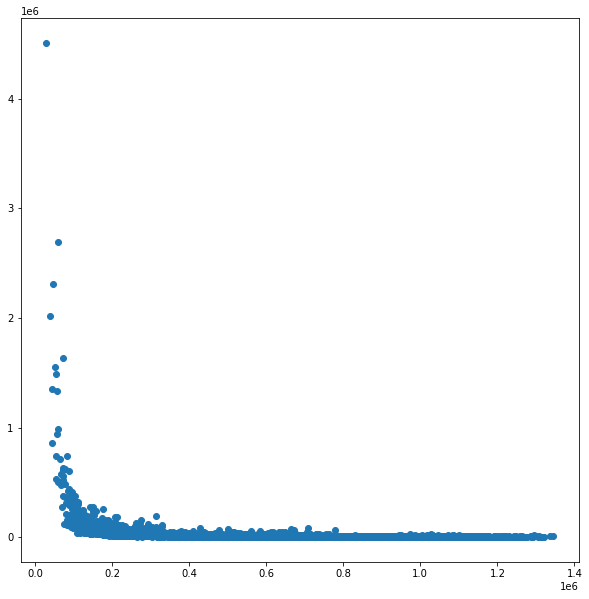

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)

In [37]:
fl_ga_si.flows = fl_ga_si.flows.astype(float)
fl_ga_si.Dij = fl_ga_si.Dij.astype(float)

In [38]:
flows = fl_ga_si.flows.values.astype(int)
Dij = fl_ga_si.Dij.values.astype(float)
Origin = fl_ga_si.Origin.values.astype(int)
Destination = fl_ga_si.Destination.values.astype(int)

In [39]:
gravity = Gravity(flows, Dij, Origin, Destination, 'pow')

In [40]:
gravity.params

array([74.83494272, -2.09036999, -2.94596271, -1.13359947])

In [205]:
import networkx as nx

In [264]:
graph = nx.from_pandas_edgelist(fl_to_ga, 'user_loc', 'fr_loc', edge_attr='scaled_sci', )

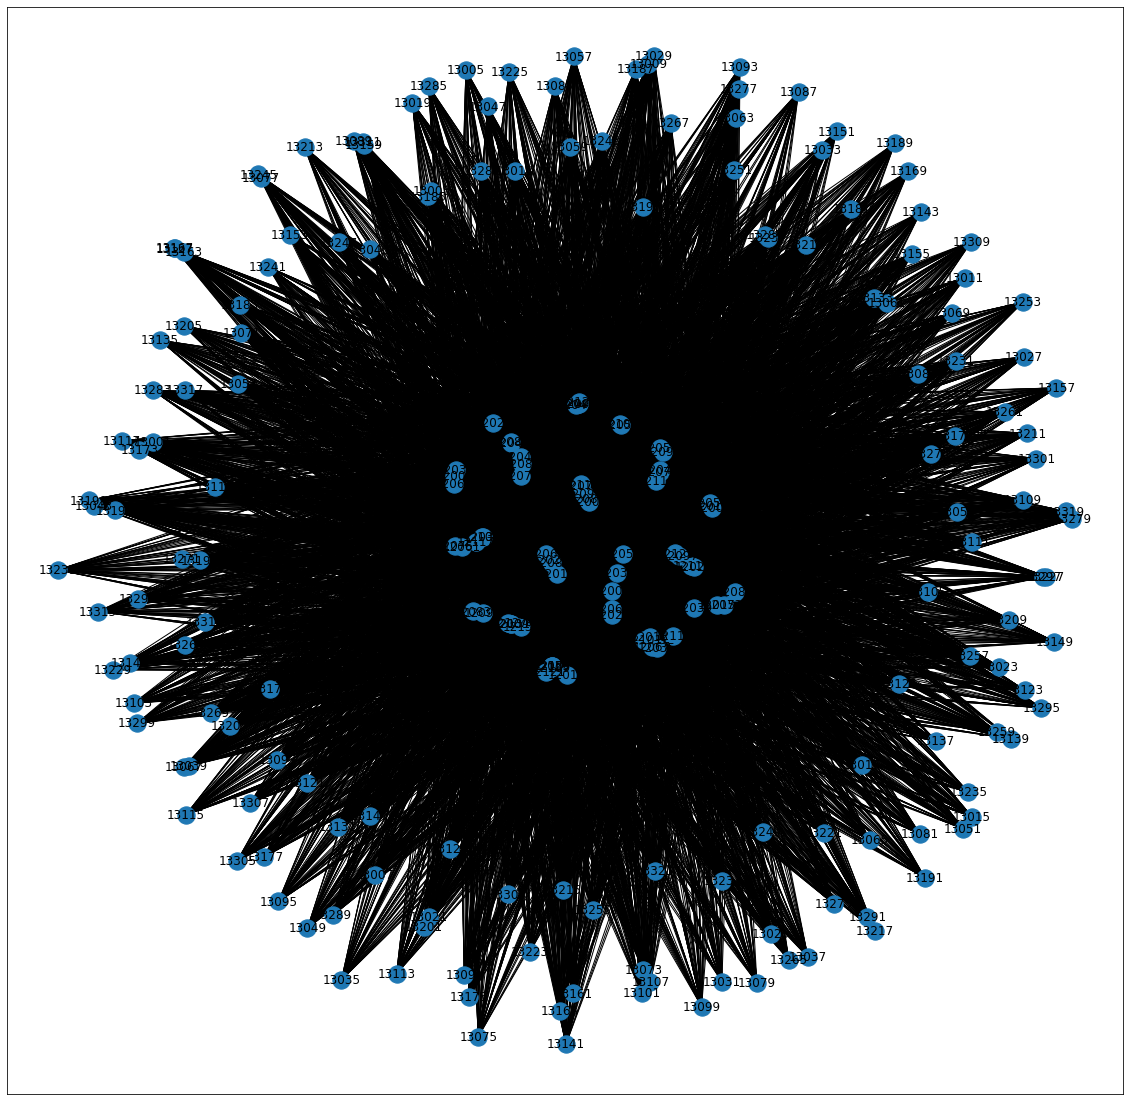

In [272]:
plt.figure(figsize=(20,20))
nx.draw_networkx(graph)